# Ethereum values - EDA and Time-series


This project was originally created in February 2018 and has been updated several times in 2018 and 2019. 

**Project description:** 

The Ethereum is the second most popular cryptocurreny after the Bitcoin. It has gain a lot of attention last year. But while some see it as another potential investment, others predict it to be a more sophisticated version of its predecessor. The reason why leads in the general use of this technolgoies: Bitcoin is used a currency and Ethereum as "a ledger technology that companies are using to build new programs" (source: https://hackernoon.com/the-primary-difference-between-ethereum-and-bitcoin-a-beginners-guide-8a892afb7a4). In addition of feeding the aspirations of a large crowd, Ethereum drew the attention of a group called 'The Enterprise Ethereum Alliance', which is super-group of "Fortune 500 companies that have all agreed to work together to learn and build upon Ethereum’s blockchain technology — otherwise referred to as “smart contract” technology".

This time, we will solely look at Ethereum as a cryptocurrency and its market value. 

Our main assumption is: **The Ethereum value can be predicted with historical values, other cryptocurrencies'indexes or other markets**


**Previous Analysis**

Most of the existing analysis on cryptocurrencies focus on the Bitcoin. 

1. MIT computer Scientists have predicted the fluctuations of the Bitcoin and have bet every two seconds accordindly to the predictions. (http://news.mit.edu/2014/mit-computer-scientists-can-predict-price-bitcoin) “We needed publicly available data, in large quantities and at an extremely fine scale,” says Shah, the Jamieson Career Development Associate Professor of Electrical Engineering and Computer Science. “We were also intrigued by the challenge of predicting a currency that has seen its prices see-saw regularly in the last few years.” They used historical data for it.

2. Predicting the fluctuations with Twitter Sentiment Analysis
(http://www.diva-portal.org/smash/get/diva2:1110776/FULLTEXT01.pdf)

3. Predicting Bitcoin index with Forum's comments
http://journals.plos.org/plosone/article?id=10.1371/journal.pone.0177630#sec003

4. Using TensorFlow
https://nicholastsmith.wordpress.com/2017/11/13/cryptocurrency-price-prediction-using-deep-learning-in-tensorflow/

5. Predicting with Google Search
https://qz.com/1052656/bitcoin-price-google-trends-can-help-you-figure-where-bitcoins-price-is-headed/


**Approach**

This project will focus on time-series analysis. It includes: 
- Exploring the data and comparing it to the Bitcoin fluctuations 
- Assessing if the data is stationary or not
- Making the series stationary 

**Data**

Our data come from http://coinmarketcap.com. 


### 1. Exploring the past value fluctuations

This part includes: 
- data collection directly from our source (coinmarketcap.com)
- data cleaning (format and columns names) 
- data visualisation (overview of closing prices and volumes fluctuations) 

In [21]:
#import libraries 
import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np

# get market info for ethereum from the start of 2016 to the current day
eth_market_info = pd.read_html("https://coinmarketcap.com/currencies/ethereum/historical-data/?start=20130428&end="+time.strftime("%Y%m%d"))[0]
# convert the date string to the correct date format
eth_market_info = eth_market_info.assign(Date=pd.to_datetime(eth_market_info['Date']))
# look at the first few rows
eth_market_info.head()

,Date,Open*,High,Low,Close**,Volume,Market Cap
0,2019-08-04,222.58,224.23,218.49,222.67,5238542572,23867371249
1,2019-08-03,217.90,224.62,217.33,222.49,5697798687,23845116864
2,2019-08-02,217.88,222.18,215.98,217.87,6159440229,23347127327
3,2019-08-01,218.55,218.81,212.91,217.81,5965442642,23337361749
4,2019-07-31,210.49,218.65,210.44,218.65,6003828340,23425015630


In [2]:
# getting the Ethereum logo
import sys
from PIL import Image
import io
import urllib    

eth_img = urllib.request.urlopen("https://upload.wikimedia.org/wikipedia/commons/thumb/0/05/Ethereum_logo_2014.svg/256px-Ethereum_logo_2014.svg.png")

image_file = io.BytesIO(eth_img.read())
eth_im = Image.open(image_file)
width_eth_im , height_eth_im  = eth_im.size
eth_im = eth_im.resize((int(eth_im.size[0]*0.8), int(eth_im.size[1]*0.8)), Image.ANTIALIAS)

In [122]:
eth_market_info.columns =[eth_market_info.columns[0]]+['eth_'+i for i in eth_market_info.columns[1:]]

In [123]:
eth_market_info.head()

,Date,eth_Open*,eth_High,eth_Low,eth_Close**,eth_Volume,eth_Market Cap
0,2019-08-04,222.58,224.23,218.49,222.67,5238542572,23867371249
1,2019-08-03,217.90,224.62,217.33,222.49,5697798687,23845116864
2,2019-08-02,217.88,222.18,215.98,217.87,6159440229,23347127327
3,2019-08-01,218.55,218.81,212.91,217.81,5965442642,23337361749
4,2019-07-31,210.49,218.65,210.44,218.65,6003828340,23425015630


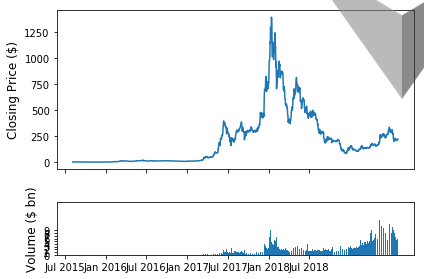

In [6]:
#our first visualization of the Ethereum market: Closing prices and Volume 

fig, (ax1, ax2) = plt.subplots(2,1, gridspec_kw = {'height_ratios':[3, 1]})
#ax1.set_yscale('log')
ax1.set_ylabel('Closing Price ($)',fontsize=12)
ax2.set_ylabel('Volume ($ bn)',fontsize=12)
ax2.set_yticks([int('%d000000000'%i) for i in range(10)])
ax2.set_yticklabels(range(10))
ax1.set_xticks([datetime.date(i,j,1) for i in range(2013,2019) for j in [1,7]])
ax1.set_xticklabels('')
ax2.set_xticks([datetime.date(i,j,1) for i in range(2013,2019) for j in [1,7]])
ax2.set_xticklabels([datetime.date(i,j,1).strftime('%b %Y')  for i in range(2013,2019) for j in [1,7]])
ax1.plot(eth_market_info['Date'].astype(datetime.datetime),eth_market_info['eth_Open*'])
ax2.bar(eth_market_info['Date'].astype(datetime.datetime).values, eth_market_info['eth_Volume'].values)
fig.tight_layout()
fig.figimage(eth_im, 300, 180, zorder=3, alpha=.6)
plt.show()

### 2. Comparing the Bitcoin and Ethereum value fluctuations

This part includes:
- importing and formatting bitcoin data 
- merging the two dataset on their index 
- visualising the open price values fluctuations of the bitcoin and ethereum

In [118]:
bitcoin_market_info.head()

,Date,bt_Open*,bt_High,bt_Low,bt_Close**,bt_Volume,bt_Market Cap
0,2019-08-05,10960.74,11895.09,10960.74,11805.65,23875988832,210848822060
1,2019-08-04,10821.63,11009.21,10620.28,10970.18,16530894787,195907875403
2,2019-08-03,10519.28,10946.78,10503.50,10821.73,15352685061,193233960601
3,2019-08-02,10402.04,10657.95,10371.01,10518.17,17489094082,187791090996
4,2019-08-01,10077.44,10446.92,9922.02,10399.67,17165337858,185653203391


In [124]:
#comparing the Ethereum market with the Bitcoin market 


# importing Bitcoin data
# get market info for bitcoin from the start of 2016 to the current day
bitcoin_market_info = pd.read_html("https://coinmarketcap.com/currencies/bitcoin/historical-data/?start=20130428&end="+time.strftime("%Y%m%d"))[0]
# convert the date string to the correct date format
bitcoin_market_info = bitcoin_market_info.assign(Date=pd.to_datetime(bitcoin_market_info['Date']))
# when Volume is equal to '-' convert it to 0
bitcoin_market_info.loc[bitcoin_market_info['Volume']=="-",'Volume']=0
# convert to int
bitcoin_market_info['Volume'] = bitcoin_market_info['Volume'].astype('int64')
bitcoin_market_info.columns =[bitcoin_market_info.columns[0]]+['bt_'+i for i in bitcoin_market_info.columns[1:]]


#comparing the two datasets 
market_info = pd.merge(bitcoin_market_info,eth_market_info, on=['Date'])
market_info = market_info[market_info['Date']>='2016-01-01']
for coins in ['bt_', 'eth_']: 
    kwargs = { coins+'day_diff': lambda x: (x[coins+'Close**']-x[coins+'Open*'])/x[coins+'Open*']}
    market_info = market_info.assign(**kwargs)
market_info.head()

,Date,bt_Open*,bt_High,bt_Low,bt_Close**,bt_Volume,bt_Market Cap,eth_Open*,eth_High,eth_Low,eth_Close**,eth_Volume,eth_Market Cap,bt_day_diff,eth_day_diff
0,2019-08-04,10821.63,11009.21,10620.28,10970.18,16530894787,195907875403,222.58,224.23,218.49,222.67,5238542572,23867371249,0.013727,0.000404
1,2019-08-03,10519.28,10946.78,10503.50,10821.73,15352685061,193233960601,217.90,224.62,217.33,222.49,5697798687,23845116864,0.028752,0.021065
2,2019-08-02,10402.04,10657.95,10371.01,10518.17,17489094082,187791090996,217.88,222.18,215.98,217.87,6159440229,23347127327,0.011164,-0.000046
3,2019-08-01,10077.44,10446.92,9922.02,10399.67,17165337858,185653203391,218.55,218.81,212.91,217.81,5965442642,23337361749,0.031975,-0.003386
4,2019-07-31,9604.05,10085.63,9598.10,10085.63,16631520648,180028959603,210.49,218.65,210.44,218.65,6003828340,23425015630,0.050143,0.038767


In [125]:
market_info.set_index('Date', inplace=True)
market_info.head()

,bt_Open*,bt_High,bt_Low,bt_Close**,bt_Volume,bt_Market Cap,eth_Open*,eth_High,eth_Low,eth_Close**,eth_Volume,eth_Market Cap,bt_day_diff,eth_day_diff
Date,,,,,,,,,,,,,,
2019-08-04,10821.63,11009.21,10620.28,10970.18,16530894787,195907875403,222.58,224.23,218.49,222.67,5238542572,23867371249,0.013727,0.000404
2019-08-03,10519.28,10946.78,10503.50,10821.73,15352685061,193233960601,217.90,224.62,217.33,222.49,5697798687,23845116864,0.028752,0.021065
2019-08-02,10402.04,10657.95,10371.01,10518.17,17489094082,187791090996,217.88,222.18,215.98,217.87,6159440229,23347127327,0.011164,-0.000046
2019-08-01,10077.44,10446.92,9922.02,10399.67,17165337858,185653203391,218.55,218.81,212.91,217.81,5965442642,23337361749,0.031975,-0.003386
2019-07-31,9604.05,10085.63,9598.10,10085.63,16631520648,180028959603,210.49,218.65,210.44,218.65,6003828340,23425015630,0.050143,0.038767


In [130]:
market_info = market_info.fillna(0)

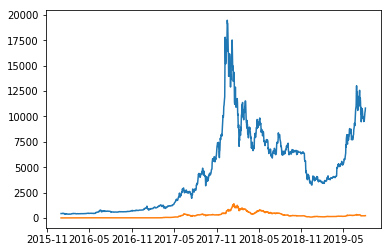

In [132]:
#comparing the evolution of the Opening Price between the Bitcoin and the Ethereum 

y = market_info['bt_Open*']
x = market_info.index
y_eth = market_info['eth_Open*']

plt.plot(x, y)
plt.plot(x, y_eth)
plt.show()

In [133]:
#More explorations: what time range does this dataset cover

print(market_info.index.min())
print(market_info.max())

2016-01-01 00:00:00
bt_Open*          1.947580e+04
bt_High           2.008900e+04
bt_Low            1.897410e+04
bt_Close**        1.949740e+04
bt_Volume         4.510573e+10
bt_Market Cap     3.265025e+11
eth_Open*         1.397480e+03
eth_High          1.432880e+03
eth_Low           1.290600e+03
eth_Close**       1.396420e+03
eth_Volume        1.866147e+10
eth_Market Cap    1.354007e+11
bt_day_diff       2.547017e-01
eth_day_diff      3.355556e-01
dtype: float64


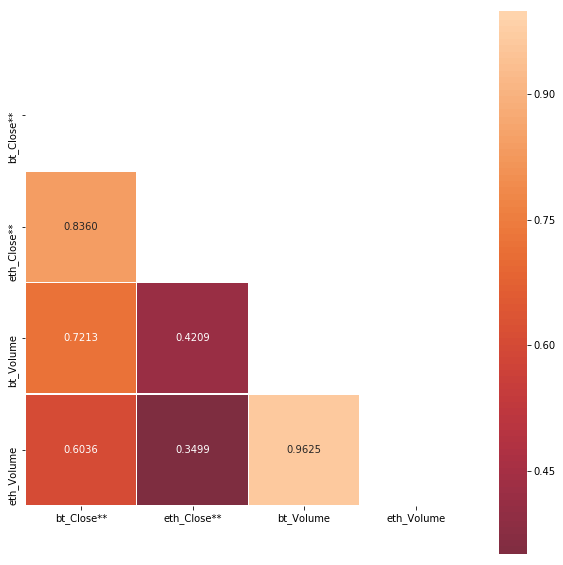

In [136]:
#Matrix correlation 
df = market_info[['bt_Close**', 'eth_Close**', 'bt_Volume', 'eth_Volume']]

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, fmt = '.4f', mask=mask, center=0, square=True, linewidths=.5)
plt.show()

### 3. Time Series Analysis 

Ths part includes: 
- applying time-series analysis to our data 
- finding out if we have stationary data

**What is a moving average analysis?**
The moving average analysis smooths out the price data and create an average price for a set timeframe. The objective is to reduce the price noise and observe more easily the behavior of a value on the market. 

I use two pandas functions for this purpose: pd.rolling_mean and pd.rolling_std. I will then compare in a chart the orginal Opening price of the Ethereum value, its rolling average and its rolling standard deviation. 

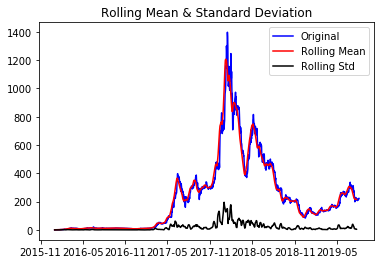

In [137]:
rollmean = y_eth.rolling(12).mean()
rollstd = y_eth.rolling(12).std()
plt.plot(y_eth, color='blue',label='Original')
plt.plot(rollmean, color='red', label='Rolling Mean')
plt.plot(rollstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()

**Because there is no constance over time** we might have non-stationary data (while the visual approach can give us some clues, we will do additional statistical tests)

**What is a stationary series?** 

A stationary series has a mean, variance and covariance that does not vary with time. Statistical models need the series data to be stationary to make precise and releavant analysis. 

**The Augmented Dickey-Fuller test** 

Null hypothesis test is: The series has a unit root. If we fail to rejet the H-null, it means that the series is non-stationary. 


In [138]:
from statsmodels.tsa.stattools import adfuller

print('Results of Dickey-Fuller Test for Raw Low Data:')
dftest = adfuller(y_eth, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-   value','#Lags Used','Number of Observations Used'])
print(dfoutput)
print('Critical Value at 5%', list(dftest[4].items())[1][1])

Results of Dickey-Fuller Test for Raw Low Data:
Test Statistic                   -1.881215
p-   value                        0.340949
#Lags Used                       23.000000
Number of Observations Used    1288.000000
dtype: float64
Critical Value at 5% -2.863786592704128


The Test Statistic value is greater than the Critical value: we cannot reject the null hypothesis, meaning that we need to do additional transformations to make it stationary.

**KPSS (Kwiatkowski-Phillips-Schmidt-Shin) Test** 

In this case, the Null Hypothesis is that the data is trend stationary. It thus means that, this time, if we cannot reject the H-null, the data is stationary. 

In [141]:
from statsmodels.tsa.stattools import kpss
#define KPSS
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)

In [142]:
kpss_test(y_eth)

Results of KPSS Test:
Test Statistic            1.77103
p-value                   0.01000
Lags Used                23.00000
Critical Value (10%)      0.34700
Critical Value (5%)       0.46300
Critical Value (2.5%)     0.57400
Critical Value (1%)       0.73900
dtype: float64


/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/stattools.py:1276: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


The test statistic is greater than the critical value, we can thus reject the null hypothesis. This confirms that the series is not stationary.

**Differencing** 

Differencing can help stabilize the mean of the time series by removing changes in the level of a time series, and so eliminating (or reducing) trend and seasonality. (— Page 215, "Forecasting: principles and practice".) 

Differencing is performed by subtracting the previous observation from the current observation:

difference(t) = observation(t) - observation(t-1)


In [114]:
#creating a df
y_eth_df = y_eth.to_frame()
y_eth_df= y_eth_df.astype(float)

#differencing 
y_eth_df['#open__price_diff'] = y_eth_df['Open*'] - y_eth_df['Open*'].shift(1)

#removing nan values
y_eth_df = y_eth_df.fillna(0)

#applying the ADF test 
adf_test(y_eth_df['#open__price_diff'])

Results of Dickey-Fuller Test:
Test Statistic                -6.133709e+00
p-value                        8.283699e-08
#Lags Used                     2.400000e+01
Number of Observations Used    1.434000e+03
Critical Value (1%)           -3.434918e+00
Critical Value (5%)           -2.863558e+00
Critical Value (10%)          -2.567844e+00
dtype: float64


The new ADF test results show us that the Test Statistic valye is lower than the critical values. We can reject the null hypothesis with 90%, 95% and 99% of confidence. It means that the series data is stationary. 